<a href="https://colab.research.google.com/github/DataWhizAnushka/ds_assignments/blob/main/LGBM%26XGBM14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LGBM & XGBM**

Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Load dataset
df = pd.read_csv('train.csv')  # Replace with your file path
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Check missing values
print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


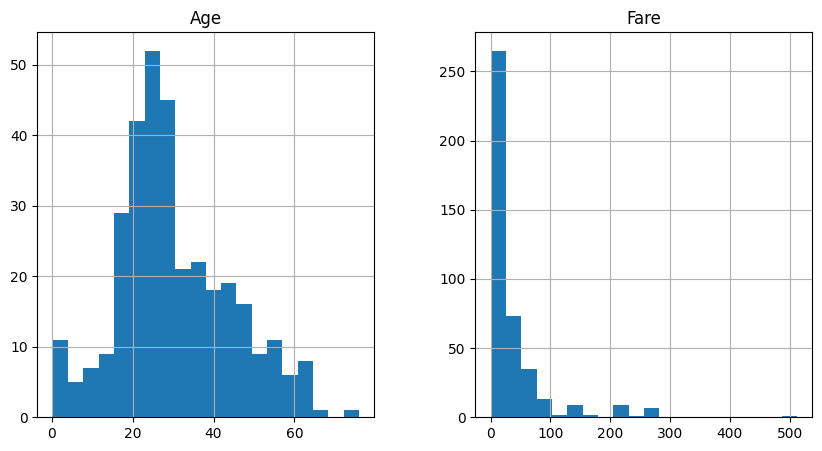

In [4]:
# Histograms for numerical variables
numerical_features = ['Age', 'Fare']
df[numerical_features].hist(bins=20, figsize=(10, 5))
plt.show()

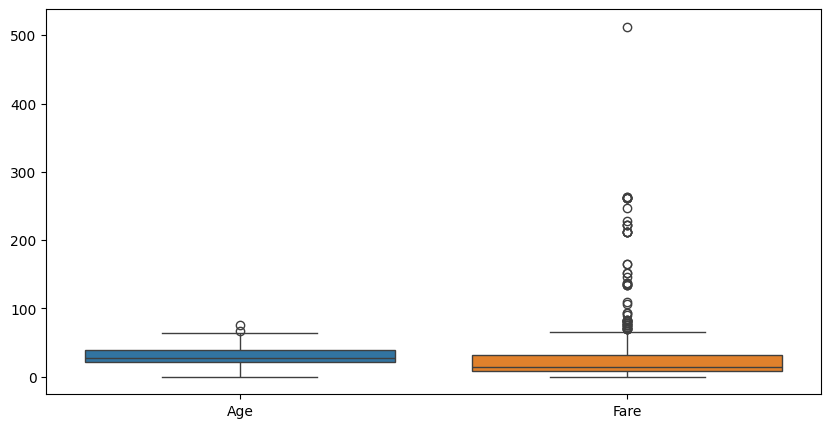

In [5]:
# Box plot to check outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_features])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# Add a placeholder 'Survived' column
df['Survived'] = np.random.randint(0, 2, size=len(df))  # Random 0 or 1


In [8]:
# Load both train and test datasets
train_df = pd.read_csv('train.csv')  # Ensure this file exists
test_df = pd.read_csv('test.csv')

# Combine train and test for preprocessing if necessary
combined_df = pd.concat([train_df, test_df], sort=False)


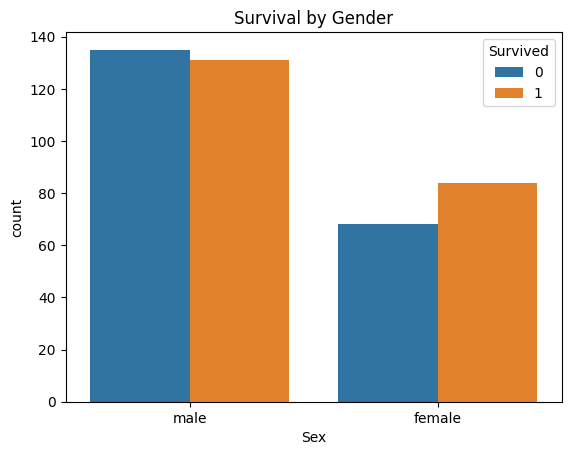

In [9]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


In [10]:
# Impute missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-10-ee1e25ad4ede>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [11]:
# Impute missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-11-833264dca572>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [12]:
# Drop Cabin column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)


In [13]:
# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [14]:
# Feature engineering: Family size
df['FamilySize'] = df['SibSp'] + df['Parch']


In [15]:
# Drop irrelevant columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [16]:
# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']


In [17]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize and train the model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 171, number of negative: 163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511976 -> initscore=0.047913
[LightGBM] [Info] Start training from score 0.047913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier(random_state=42)

In [21]:
# Make predictions
lgbm_pred = lgbm.predict(X_test)


In [23]:
# Evaluate the model
print("LightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, lgbm_pred))
print("Precision:", precision_score(y_test, lgbm_pred))
print("Recall:", recall_score(y_test, lgbm_pred))
print("F1-Score:", f1_score(y_test, lgbm_pred))

LightGBM Performance:
Accuracy: 0.42857142857142855
Precision: 0.45652173913043476
Recall: 0.4772727272727273
F1-Score: 0.4666666666666667


In [25]:
# Initialize and train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:58:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [26]:
# Make predictions
xgb_pred = xgb.predict(X_test)

In [27]:
# Evaluate the model
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1-Score:", f1_score(y_test, xgb_pred))

XGBoost Performance:
Accuracy: 0.4523809523809524
Precision: 0.4772727272727273
Recall: 0.4772727272727273
F1-Score: 0.4772727272727273


In [33]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import warnings
import logging

logging.basicConfig(level=logging.ERROR)
warnings.filterwarnings('always')

# Redirect warnings to logs
logging.captureWarnings(True)


In [40]:
param_grid_lgbm = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_lgbm = GridSearchCV(LGBMClassifier(random_state=42), param_grid_lgbm, scoring='accuracy', cv=5)
grid_lgbm.fit(X_train, y_train)

print("Best Parameters for LightGBM:", grid_lgbm.best_params_)

  and should_run_async(code)



Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 267, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513109 -> initscore=0.052446
[LightGBM] [Info] Start training from score 0.052446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

  _data = np.array(data, dtype=dtype, copy=copy,



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [41]:
param_grid_lgbm = {
    'num_leaves': [15, 31],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'min_child_samples': [10, 20]
}


  and should_run_async(code)



In [42]:
# Check class distribution
print(y_train.value_counts())

  and should_run_async(code)



Survived
1    171
0    163
Name: count, dtype: int64


In [43]:
param_grid_xgb = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid_xgb, scoring='accuracy', cv=5)
grid_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_xgb.best_params_)


  and should_run_async(code)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Parameters: {

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [44]:
# Compile metrics
metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, lgbm_pred), accuracy_score(y_test, xgb_pred)],
    'Precision': [precision_score(y_test, lgbm_pred), precision_score(y_test, xgb_pred)],
    'Recall': [recall_score(y_test, lgbm_pred), recall_score(y_test, xgb_pred)],
    'F1-Score': [f1_score(y_test, lgbm_pred), f1_score(y_test, xgb_pred)]
}

metrics_df = pd.DataFrame(metrics)

  and should_run_async(code)



  and should_run_async(code)



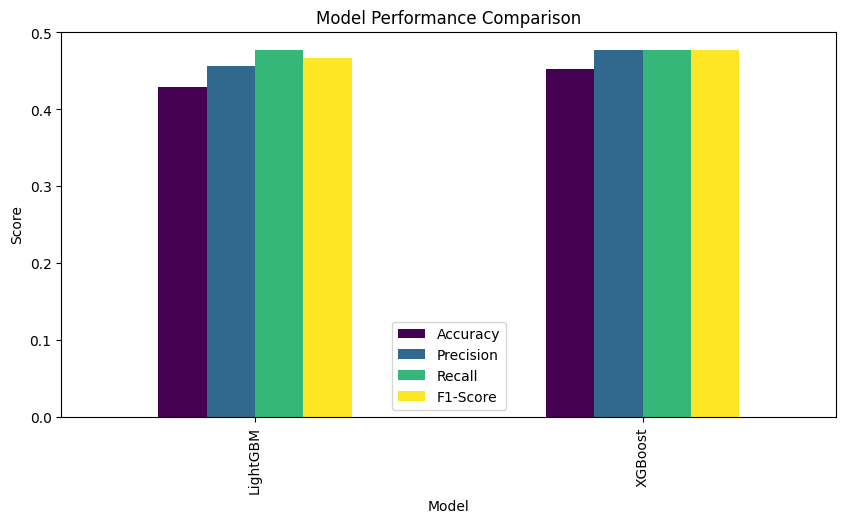

In [45]:
# Bar plot for comparison
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 5), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()